# Problem Statement :-
Customers churn out from the telecom company.

## Objective -
 To  analyze the data of the telecom company and find the insights and make solution to stop the customers from churning out of the telecom company
Exploring Customer Churn Prediction with Various Machine Learning Models with hyperparameter tunning.

####About the dataset contain : -
1) customerID
2) Gender
3) Senior Citizen
4) Partner
5) Dependents
6) Tenure
7) Phone Service
8) Mutiple Lines
9) Internet Service
10) Online Security
11) Device Protection
12) Tech support
13) Streaming TV
14) Online Backup
15) Stream Movies
16) Contract
17) Paperless Billing
18) Payment Method
19) Monthly Charges
20) Total Charges
21) Churn - Target column


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.shape

(7043, 21)

In [5]:
data.size

147903

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
0002-ORFBO  Female  0              Yes      Yes         9       Yes           No                DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.3         No       1
6616-AALSR  Female  0              Yes      Yes         65      Yes           Yes               Fiber optic      Yes                  No                   Yes                  No                   Yes                  Yes                  Two year        Yes               Credit card (automatic)    104.30          6725.3 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
data.describe(include = 'O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [12]:

data_object = data.select_dtypes(include=['object'])
for column in data_object:
    print("Value counts for", column)
    print(data[column].value_counts())
    print()

Value counts for customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Value counts for gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts for Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value counts for Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value counts for PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value counts for MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Value counts for InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Value counts for OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No

In [13]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

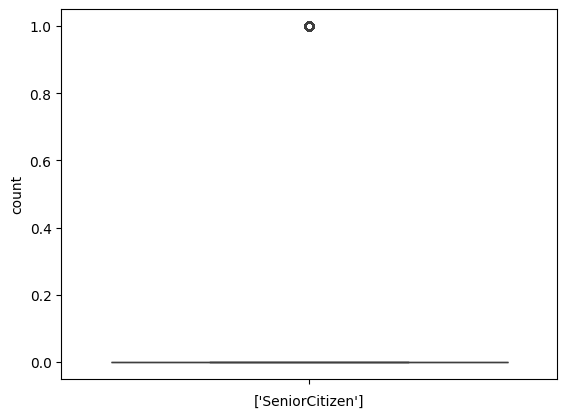

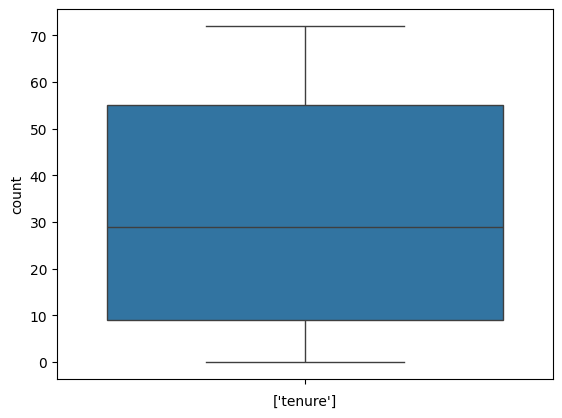

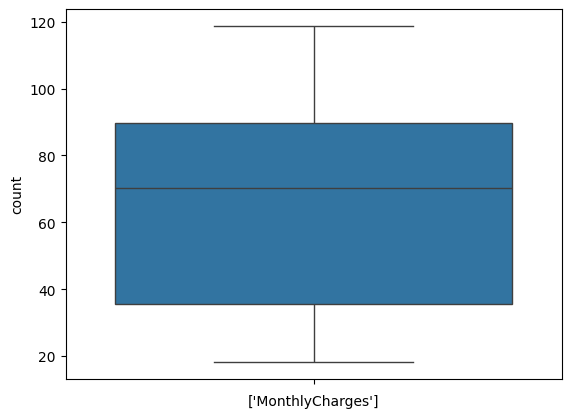

In [14]:
for i in data.columns:
  if data[i].dtypes != 'object':
    sns.boxplot(data[i])
    plt.xlabel([i])
    plt.ylabel("count")
    plt.show()

In [15]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Conclusion -
As we can see there is outlier in SeniorCitizen. So we can simply drop the values which are very far from mean.

In [16]:
Q1 = data.SeniorCitizen.quantile(0.25)
Q3 = data.SeniorCitizen.quantile(0.75)
IQR = Q3 - Q1

data = data[(data['SeniorCitizen'] >= Q1 -1.5*IQR) & (data['SeniorCitizen'] <= Q3 + 1.5*IQR)]



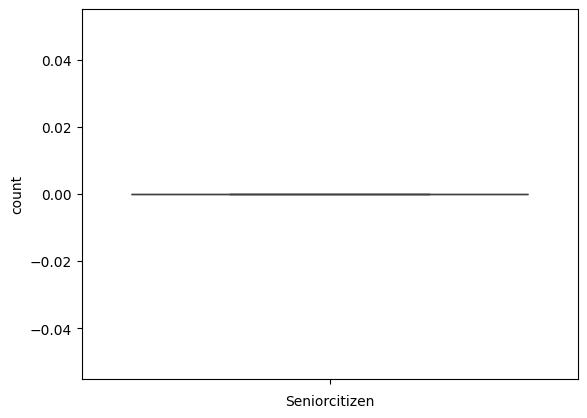

In [17]:
sns.boxplot(data['SeniorCitizen'])
plt.xlabel('Seniorcitizen')
plt.ylabel('count')
plt.show()

In [18]:
num_data = data[['SeniorCitizen','tenure','MonthlyCharges']]

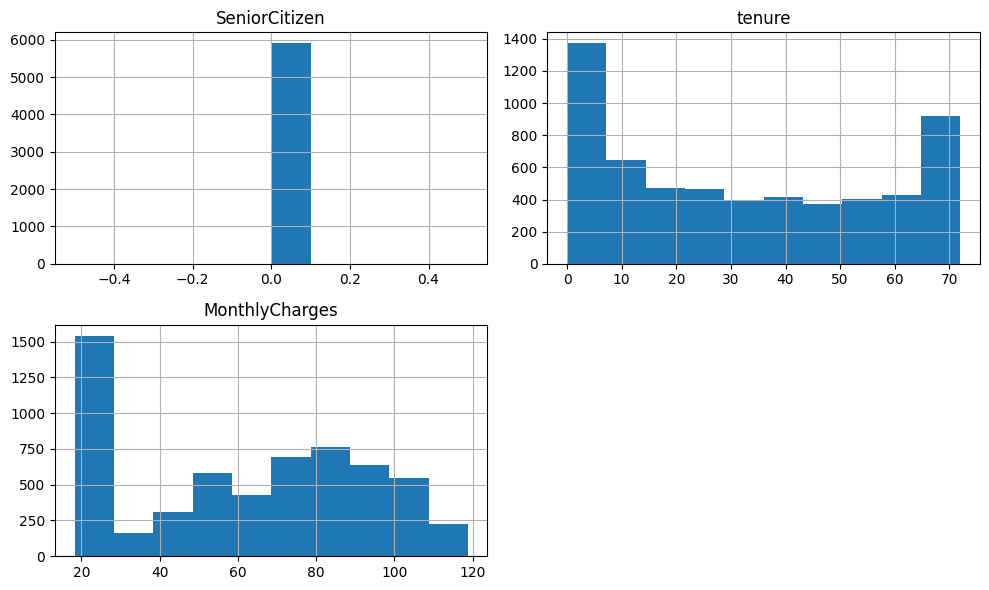

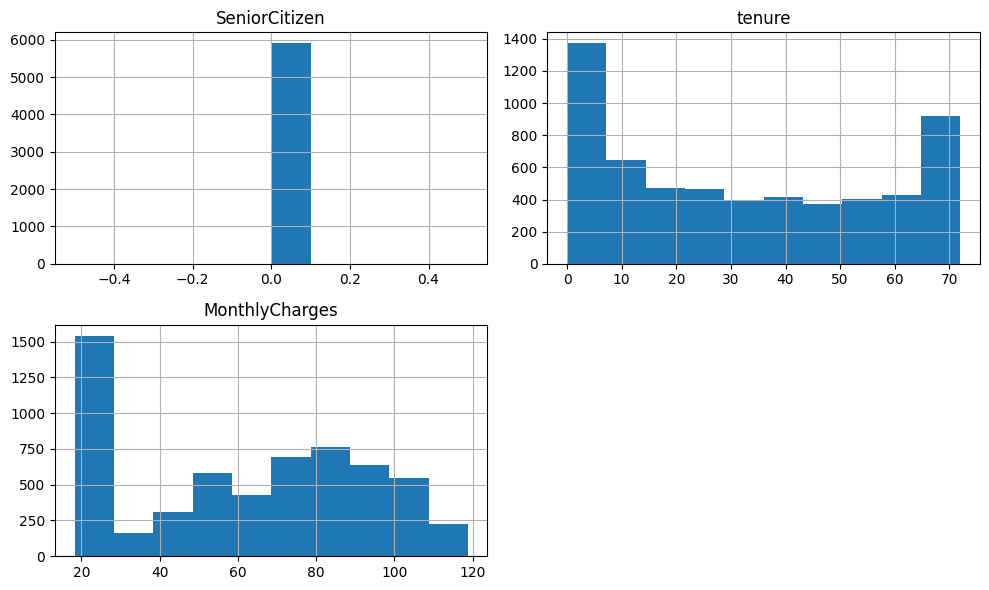

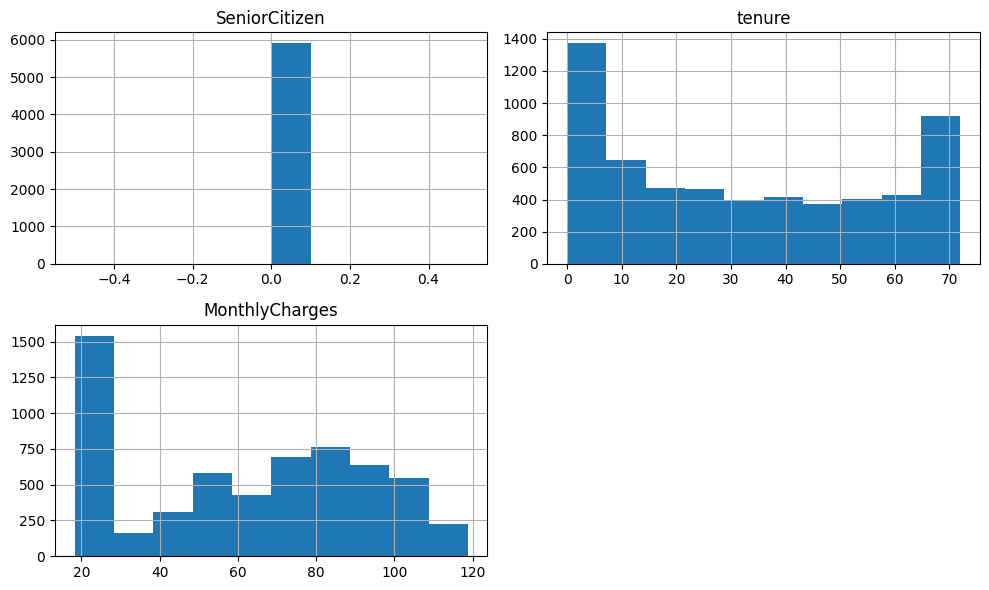

In [19]:
for i in num_data:
  num_data.hist(figsize=(10, 6))  # Set the size of the figure
  plt.tight_layout()  # Adjust layout to prevent overlap of axis labels
  plt.show()

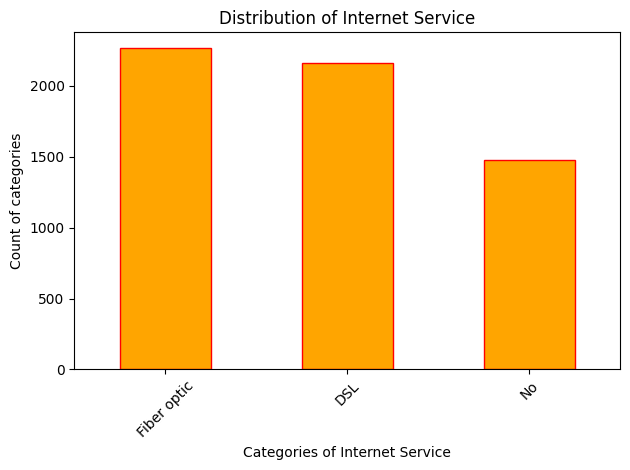

In [20]:
internet_service_counts = data['InternetService'].value_counts()

# Plot the bar plot
internet_service_counts.plot(kind='bar', color='orange', edgecolor='red')

# Adding labels and title
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of categories")
plt.title("Distribution of Internet Service")

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()

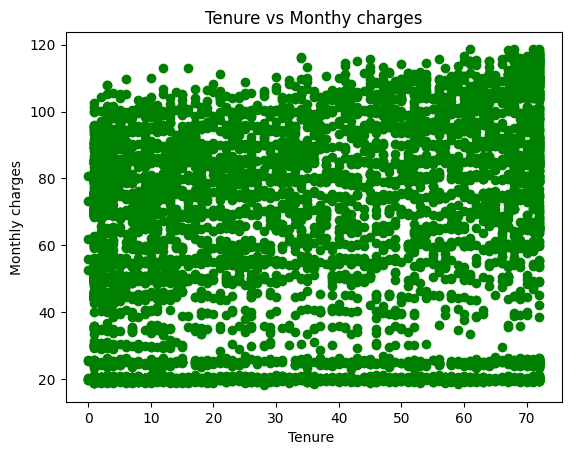

In [21]:

plt.scatter(data['tenure'], data['MonthlyCharges'], color='green', marker='o')

# Adding labels and title
plt.xlabel('Tenure ')
plt.ylabel('Monthly charges')
plt.title('Tenure vs Monthy charges')

# Show plot
plt.show()

In [22]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'.
col_list = data_object.columns
for i in col_list:
    data[i]=label_encoder.fit_transform(data[i])

<ipython-input-22-67a16190878e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=label_encoder.fit_transform(data[i])
<ipython-input-22-67a16190878e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=label_encoder.fit_transform(data[i])
<ipython-input-22-67a16190878e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [23]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4490,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2137,0
1,3306,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1270,0
2,2155,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,141,1
3,4631,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1212,0
4,5445,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,814,1


In [24]:
data_object.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

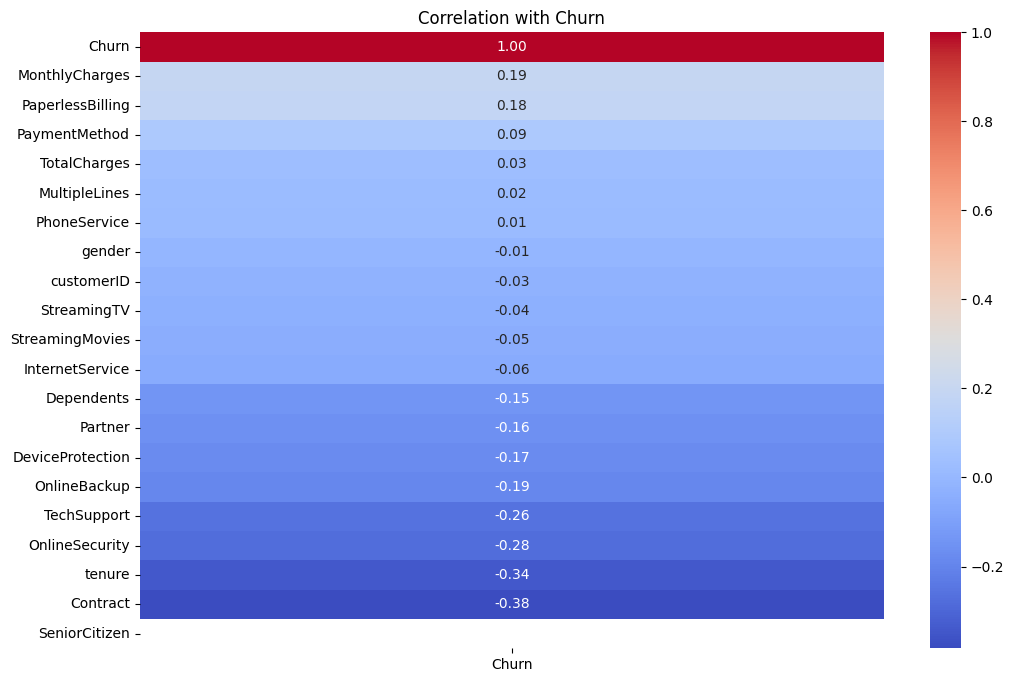

In [25]:
correlation_matrix = data.corr()

# Plot heatmap for correlation with 'Churn'
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Churn')
plt.show()

#### Conclusion :-
  Monthlycharges, paperless billing, seniorcitizen, payment methods show the higheest correlation with churn

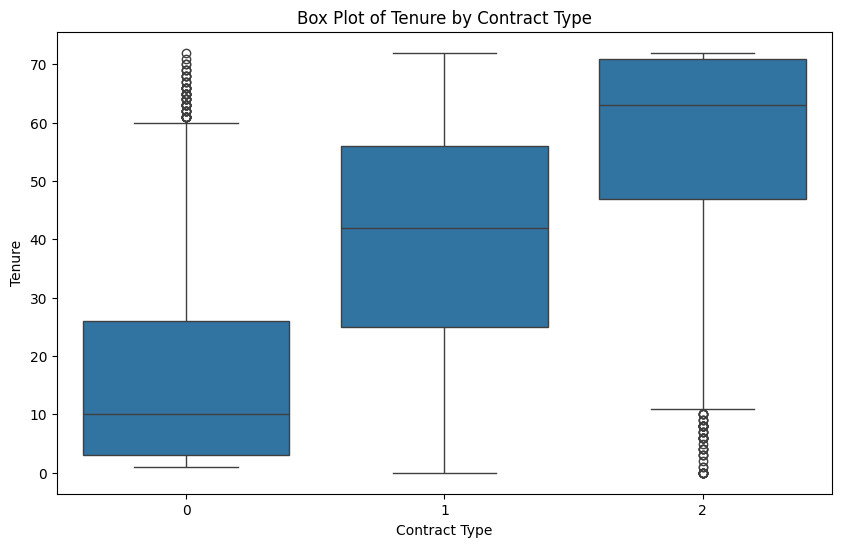

In [26]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x=data['Contract'], y=data['tenure'], data=data)

# Adding labels and title
plt.xlabel('Contract Type')
plt.ylabel('Tenure')
plt.title('Box Plot of Tenure by Contract Type')

# Show plot
plt.show()

#### 0- Month to month, 1- One-year contract type, 2 - Two year

---
From above graph it shows that tenure -  the number of years that the customer company is increases as the contract increases

<Axes: title={'center': 'Correlation in of attributes'}>

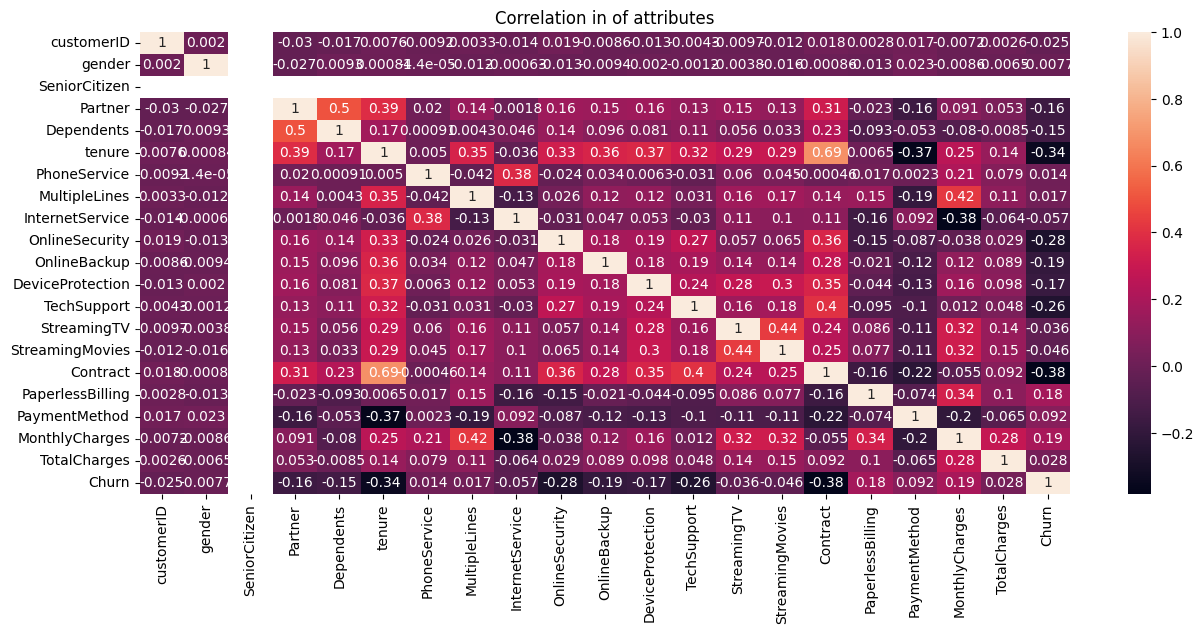

In [41]:
data.corr()
plt.figure(figsize = (15,6))
plt.title("Correlation in of attributes")
sns.heatmap(data.corr(),annot = True)

In [51]:
data.shape

(5901, 21)

In [27]:
x = data.iloc[::-1]
y = data['Churn']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state= 30)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
test_pred = logisticRegr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
pred = pd.DataFrame()
pred["y_test"] = y_test #actual answer key
pred["y_pred"] = test_pred #answers given by model
pred

,y_test,y_pred
2866,0,0
3016,1,0
3081,1,0
3707,0,0
304,0,0
...,...,...
3727,1,0
4544,1,0
1150,0,0
3345,0,0


In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,test_pred)

0.7933604336043361

In [31]:
confusion_matrix(y_test,test_pred)

array([[1171,    0],
       [ 305,    0]])

In [77]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # You can replace this with any other estimator you want to use


# Separate features and target
X = data.drop(columns=['Churn'])  # Features
y = data['Churn']  # Target

# Initialize the estimator (e.g., logistic regression)
estimator = LogisticRegression(max_iter = 1000)  # You can replace this with any other estimator you want to use

# Initialize RFE
rfe = RFE(estimator, n_features_to_select=15)
# Fit RFE
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected Features:", selected_features.tolist())

Selected Features: ['gender', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with the selected features
logisticRegr = LogisticRegression()

# Train the model using the training data
logisticRegr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logisticRegr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.817104149026249


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
X = data.drop(columns=['Churn'])  # Features
y = data['Churn']  # Target

# Initialize the estimator (Decision Tree classifier)
estimator = DecisionTreeClassifier()

# Initialize RFE
rfe = RFE(estimator, n_features_to_select=16)  # Select 2 features

# Create a pipeline with RFE and DecisionTreeClassifier
pipeline = Pipeline([('feature_selection', rfe), ('classification', estimator)])

# Fit the pipeline
pipeline.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected Features:", selected_features.tolist())

Selected Features: ['customerID', 'gender', 'Partner', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with the selected features
classifier = DecisionTreeClassifier()

# Train the model using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7510584250635055


### With giving maximum accuracy with 16 features by REF

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

X = data[['customerID', 'gender', 'Partner', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]  # Replace feature1, feature2, ... with your feature names

#  Scale Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### HyperParameter Tunning -
1) RandomSearchCV
2) GridSearch CV

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
model = RandomForestClassifier()

In [100]:
param_dist = {
    'n_estimators' : randint(10,100),
    'max_depth' : randint(1,20),
    'min_samples_split' : randint(2,20),
    'min_samples_leaf' : randint(1,20),
    'max_features': ['auto','sqrt','log2']
    }

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter = 100, cv = 5, random_state = 40)
random_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d493eda4130>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d49358215a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d493eda5f90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d4935b7cfd0>},
                   random_state=40)

In [102]:
print("Best Score", random_search.best_score_)

Best Score 0.763135593220339


In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
rf = RandomForestClassifier()

In [105]:
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth' : [10,20,30],
    'min_samples_split': [2,5,10]
}

In [106]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [107]:
best_rf = grid_search.best_estimator_

In [108]:
accuracy = best_rf.score(x_test,y_test)

In [109]:
print("Accuracy : ", accuracy)

Accuracy :  0.7679932260795935


## Conclusion :-

1) The best model is  Logistic Regression with selected features by REF for the
customer churn data with accuracy of  81 %.

2) Based on the correlation analysis, it appears that Monthly Charges, Paperless Billing, Senior Citizenship, and certain Payment Methods exhibit the highest correlation with Churn. Specifically, higher Monthly Charges, utilization of Paperless Billing, Senior Citizenship status, and certain Payment Methods are associated with an increased likelihood of churn among customers.